In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
#opening data frame
df = pd.read_csv("nba2021_advanced.csv")
dfper = pd.read_csv("nba2021_per_game.csv")
dfmin = pd.read_csv("nba2021_per36min.csv")

### Player Average Stats

In [91]:
#player position
dfper['Pos'].value_counts()

SG       122
PF       102
PG        92
C         89
SF        84
G          4
F          2
SF-PF      1
F-C        1
Name: Pos, dtype: int64

In [92]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfper['Pos'] = le.fit_transform(dfper['Pos'])

In [93]:
dfper['Pos'].value_counts()

8    122
4    102
5     92
0     89
6     84
3      4
1      2
7      1
2      1
Name: Pos, dtype: int64

### Player Advance Stats

In [94]:
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [95]:
#label encode the position
df['Pos'] = le.fit_transform(df['Pos'])
df['Pos'].head()

0    4
1    5
2    0
3    0
4    0
Name: Pos, dtype: int32

### Join advance_data to per minute 

In [96]:
mdf = pd.merge(dfper,df, left_on = "Player", right_on = "Player")
mdf.head()

,Player,Pos_x,Age_x,Tm_x,G_x,GS,MP_x,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,4,21,MIA,28,2,14.6,2.6,4.4,0.590,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,5,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,0,27,NOP,27,27,28.1,3.5,5.8,0.603,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,0,23,MIA,26,26,33.6,7.4,12.9,0.573,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,0,35,SAS,18,18,26.7,5.9,12.5,0.476,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [97]:
#dropping repeated columns asdfasdf
mdf = mdf.drop(['Pos_y', 'Age_y', 'Tm_y', 'G_y', 'MP_y'], axis = 1)
#renaming repeated columns
mdf.rename(columns = {'Pos_x':'Pos', 'Age_x':'Age', 'Tm_x':'Tm', 'G_x':'G','MP_x':"MP"}, inplace = True)
mdf.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [98]:
mdf.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,4,21,MIA,28,2,14.6,2.6,4.4,0.590,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,5,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,0,27,NOP,27,27,28.1,3.5,5.8,0.603,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,0,23,MIA,26,26,33.6,7.4,12.9,0.573,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,0,35,SAS,18,18,26.7,5.9,12.5,0.476,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


# Position Split

 ### Extract Point Guard dfper_pg

In [99]:
#query filtering out the position
mdf_pg = mdf.query('Pos == 5')
mdf_pg.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
1,Jaylen Adams,5,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
23,Cole Anthony,5,20,ORL,25,17,26.7,4.0,10.8,0.375,...,14.8,22.0,-0.6,0.6,0.0,0.000,-3.0,-1.1,-4.1,-0.4
25,Ryan Arcidiacono,5,26,CHI,11,0,9.7,0.8,2.2,0.375,...,7.1,11.2,0.2,0.1,0.3,0.119,-2.5,0.9,-1.6,0.0
26,D.J. Augustin,5,33,MIL,27,0,17.8,1.7,5.1,0.336,...,12.5,15.3,0.6,0.3,0.8,0.083,-0.5,-1.6,-2.2,0.0
32,LaMelo Ball,5,19,CHO,28,8,27.7,5.4,12.4,0.437,...,16.5,24.8,0.8,1.0,1.8,0.113,1.8,1.0,2.8,0.9


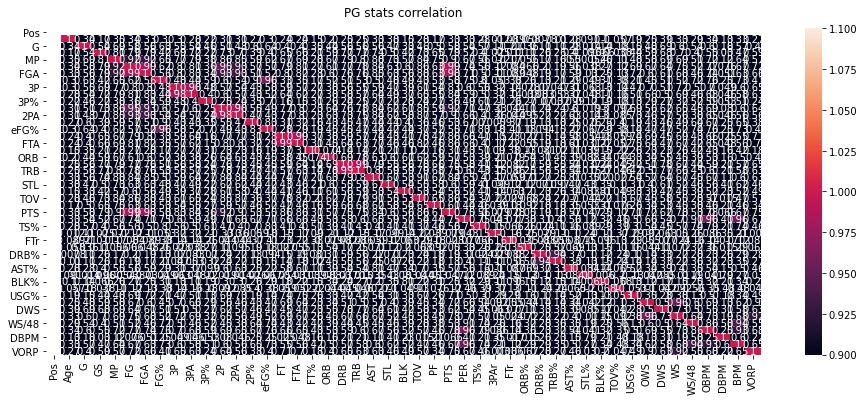

In [100]:
#check correlations
plt.figure(figsize = (16,6))
pg_heatmap = sns.heatmap(mdf_pg.corr(),vmin=--1,vmax=1, annot = True)
pg_heatmap.set_title('PG stats correlation', fontdict={'fontsize':12}, pad=12);

In [101]:
#convert to csv
mdf_pg.to_csv(r'C:\Users\David\Desktop\basketball\position\PG\pg_data.csv', index = False, header = True)

### Extract Shooting Guard Data dfper_sg 

In [102]:
#query filter out the SG
mdf_sg = mdf.query('Pos == 8')
mdf_sg.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
5,Ty-Shon Alexander,8,22,PHO,3,0,2.7,0.0,1.0,0.000,...,0.0,16.8,-0.1,0.0,-0.1,-0.327,-16.4,-4.8,-21.2,0.0
6,Nickeil Alexander-Walker,8,22,NOP,23,3,19.2,3.3,8.2,0.410,...,12.9,22.4,-0.2,0.4,0.2,0.025,-2.6,0.1,-2.5,-0.1
7,Grayson Allen,8,25,MEM,19,8,23.9,3.2,7.4,0.429,...,11.3,16.5,0.7,0.4,1.1,0.113,0.4,0.1,0.5,0.3
30,Dwayne Bacon,8,25,ORL,29,20,24.9,4.1,9.6,0.423,...,6.2,19.1,0.1,0.6,0.7,0.046,-2.9,-0.9,-3.8,-0.3
35,Desmond Bane,8,22,MEM,20,2,22.8,3.8,7.8,0.484,...,12.4,17.3,0.5,0.3,0.8,0.080,-0.6,-0.9,-1.5,0.1


In [103]:
mdf_sg.to_csv(r'C:\Users\David\Desktop\basketball\position\SG\sg_data.csv', index = False, header = True)

### Extract Power Forward data dfper_pf

In [104]:
#query filter out the PF
mdf_pf = mdf.query('Pos == 4')
mdf_pf.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,4,21,MIA,28,2,14.6,2.6,4.4,0.590,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
17,Al-Farouq Aminu,4,30,ORL,2,0,8.0,0.5,0.5,1.000,...,51.5,10.3,0.0,0.0,0.0,-0.034,-3.4,0.1,-3.3,0.0
18,Kyle Anderson,4,27,MEM,24,24,28.1,5.0,10.7,0.467,...,10.7,20.1,1.1,0.8,1.9,0.134,1.9,1.1,2.9,0.8
19,Giannis Antetokounmpo,4,26,MIL,27,27,33.6,10.3,18.4,0.563,...,13.9,33.0,2.7,1.5,4.3,0.226,5.2,2.0,7.2,2.1
20,Kostas Antetokounmpo,4,23,LAL,1,0,8.0,0.0,2.0,0.000,...,50.0,21.7,-0.1,0.0,-0.1,-0.407,-19.3,2.0,-17.3,0.0


In [105]:
mdf_pf.to_csv(r'C:\Users\David\Desktop\basketball\position\PF\pf_data.csv', index = False, header = True)

### Extract Small Forward data dfper_sf 

In [106]:
mdf_sf = mdf.query('Pos == 6')

In [107]:
mdf_sf.to_csv(r'C:\Users\David\Desktop\basketball\position\SF\sf_data.csv', index = False, header = True)

### Extract Center data dfper_c

In [108]:
mdf_c = mdf.query('Pos == 0')

In [109]:
mdf_c.to_csv(r'C:\Users\David\Desktop\basketball\position\C\c_data.csv', index = False, header = True)